In [1]:
# Kütüphaneleri yükleme
import pandas as pd  # Veri işleme için
import numpy as np   # Sayısal işlemler için
import matplotlib.pyplot as plt  # Görselleştirme için
import seaborn as sns  # Daha gelişmiş görselleştirme için
from scipy import stats  # İstatistiksel testler için
from sklearn.impute import SimpleImputer  # Eksik veri doldurma için
from sklearn.preprocessing import StandardScaler  # Veri ölçeklendirme için

In [6]:
# 1. VERİ YÜKLEME VE ÖN İŞLEME
# =============================================================================

# CSV dosyasını pandas DataFrame'e yükleme
from google.colab import files  # Google Colab ortamında dosya yüklemek için gerekli modül
uploaded = files.upload()  # Bilgisayardan Colab'e dosya yüklemek için dosya seçme ekranını açar

df = pd.read_csv('customer_experience_data.csv')

# Now you can drop the Customer_ID column
df = df.drop(columns=['Customer_ID'], errors='ignore')

# errors='ignore' parametresi sütun yoksa hata vermeyi engeller

# Veri setinin boyutunu ve ilk 5 satırını görüntüleme
print("Veri Seti Boyutu:", df.shape)  # (satır sayısı, sütun sayısı)
print("\nİlk 5 Gözlem:")
print(df.head())  # DataFrame'in ilk 5 satırını gösterir

Saving customer_experience_data.csv to customer_experience_data (3).csv
Veri Seti Boyutu: (1000, 13)

İlk 5 Gözlem:
   Age  Gender  Location  Num_Interactions  Feedback_Score  \
0   56    Male     Urban                11               4   
1   69    Male  Suburban                10               3   
2   46    Male     Urban                 5               5   
3   32  Female  Suburban                 5               1   
4   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   
4                   8               46           17.897471   

   Satisfaction_Score Retention_Status  Gender_Encoded  Location_Encoded  \
0                   7         Retained               1        

In [7]:
# 2. İSTATİSTİKSEL ÖZET
# =============================================================================

# Sayısal değişkenler için temel istatistikler
print("\nTemel İstatistikler:")
# describe() metodu count, mean, std, min, max ve çeyreklikleri gösterir
print(df.describe())

# Kategorik değişkenler için özet istatistikler
cat_cols = ['Gender', 'Location', 'Retention_Status']  # Kategorik sütunlar
print("\nKategorik Değişken Özeti:")
# Kategorik değişkenler için count, unique, top ve freq bilgileri
print(df[cat_cols].describe())


Temel İstatistikler:
              Age  Num_Interactions  Feedback_Score  Products_Purchased  \
count  1000.00000       1000.000000     1000.000000         1000.000000   
mean     43.81900          7.545000        2.985000           10.417000   
std      14.99103          4.016978        1.418022            5.345623   
min      18.00000          1.000000        1.000000            1.000000   
25%      31.00000          4.000000        2.000000            6.000000   
50%      44.00000          8.000000        3.000000           11.000000   
75%      56.00000         11.000000        4.000000           15.000000   
max      69.00000         14.000000        5.000000           19.000000   

       Products_Viewed  Time_Spent_on_Site  Satisfaction_Score  \
count      1000.000000         1000.000000         1000.000000   
mean         27.370000           32.274399            5.540000   
std          12.939572           15.734978            2.904279   
min           5.000000            5.11

In [9]:
# 3. EKSİK DEĞER ANALİZİ
# =============================================================================

# Eksik değerleri tespit etme (YOKMUŞ)
print("\nEksik Değer Analizi:")
# Her sütundaki eksik değerlerin toplamını hesaplar
missing_values = df.isnull().sum()
# Sadece eksik değer içeren sütunları gösterir
print(missing_values[missing_values > 0])



Eksik Değer Analizi:
Series([], dtype: int64)


In [10]:
# Eksik değer doldurma (eğer varsa) yapacaklarım bunlar olurdu
if missing_values.sum() > 0:  # Eğer eksik değer varsa
    # Sayısal değişkenler için medyan ile doldurma
    num_imputer = SimpleImputer(strategy='median')  # Medyan stratejisi
    # Sayısal sütunları seçer (int ve float tipler)
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    # Seçilen sütunlarda eksik değerleri medyanla doldurur
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Kategorik değişkenler için mod (en sık görülen değer) ile doldurma
    cat_imputer = SimpleImputer(strategy='most_frequent')  # Mod stratejisi
    # Kategorik sütunlarda eksik değerleri modla doldurur
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [12]:
# 4. AYKIRI DEĞER ANALİZİ
# =============================================================================

print("\nAykırı Değer Analizi (IQR Yöntemi):")

# IQR yöntemiyle aykırı değerleri tespit eden fonksiyon
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 1. çeyreklik
    Q3 = data[column].quantile(0.75)  # 3. çeyreklik
    IQR = Q3 - Q1  # Çeyrekler arası aralık
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır
    # Sınırların dışındaki değerleri tespit eder
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Aykırı değer analizi yapılacak sayısal sütunlar
num_cols = ['Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased',
            'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score']

# Her sayısal sütun için aykırı değer sayısını hesaplar ve yazdırır
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} aykırı değer")



Aykırı Değer Analizi (IQR Yöntemi):
Age: 0 aykırı değer
Num_Interactions: 0 aykırı değer
Feedback_Score: 0 aykırı değer
Products_Purchased: 0 aykırı değer
Products_Viewed: 0 aykırı değer
Time_Spent_on_Site: 0 aykırı değer
Satisfaction_Score: 0 aykırı değer


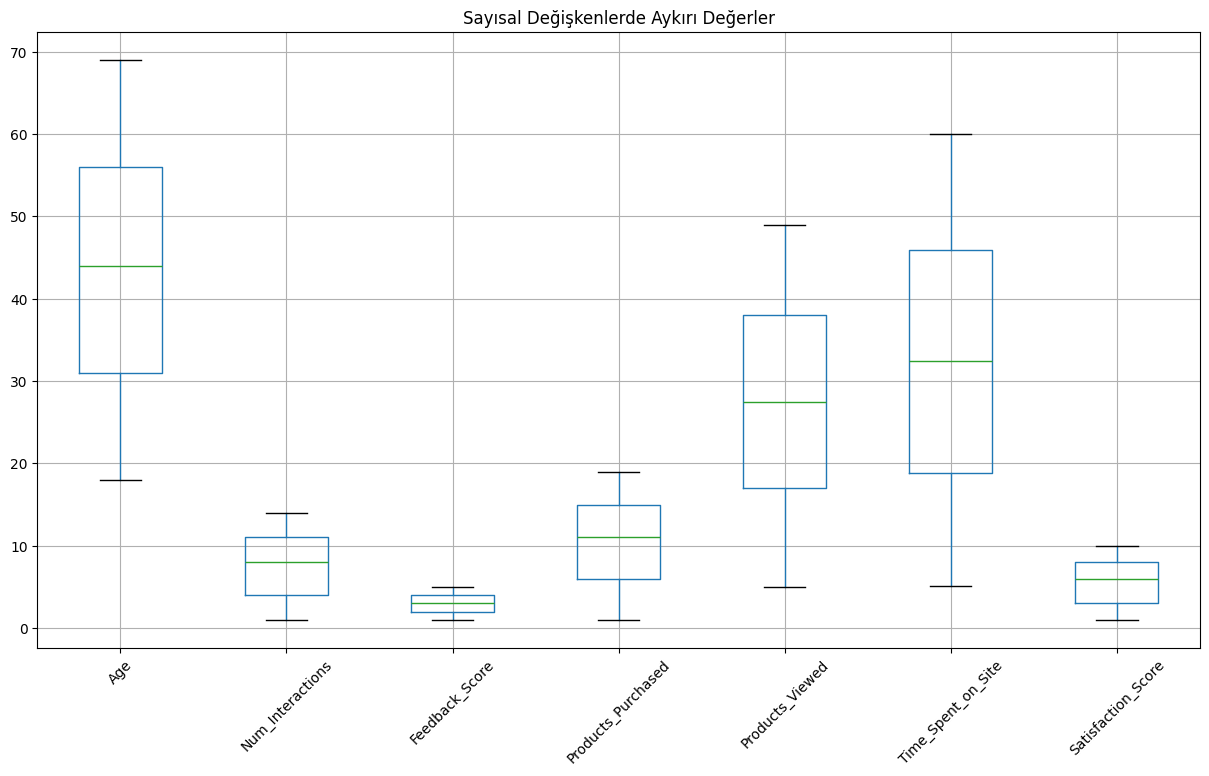

In [13]:
# Aykırı değerleri görselleştirme (Boxplot)
plt.figure(figsize=(15,8))  # Grafik boyutu
# Tüm sayısal değişkenler için kutu grafikleri oluşturur
df[num_cols].boxplot()
plt.title('Sayısal Değişkenlerde Aykırı Değerler')  # Başlık
plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndürür
plt.show()  # Grafiği gösterir


In [15]:
# Z-puanı yöntemiyle aykırı değer tespiti
z_scores = stats.zscore(df[num_cols])  # Z-skorlarını hesaplar
abs_z_scores = np.abs(z_scores)  # Mutlak değerlerini alır
# Z-skoru 3'ten büyük olanları aykırı değer olarak işaretler
outliers = (abs_z_scores > 3).any(axis=1)
print(f"\nZ-puanına göre toplam aykırı değer sayısı: {outliers.sum()}")


Z-puanına göre toplam aykırı değer sayısı: 0


In [17]:
# 5. VERİ GÖRSELLEŞTİRME

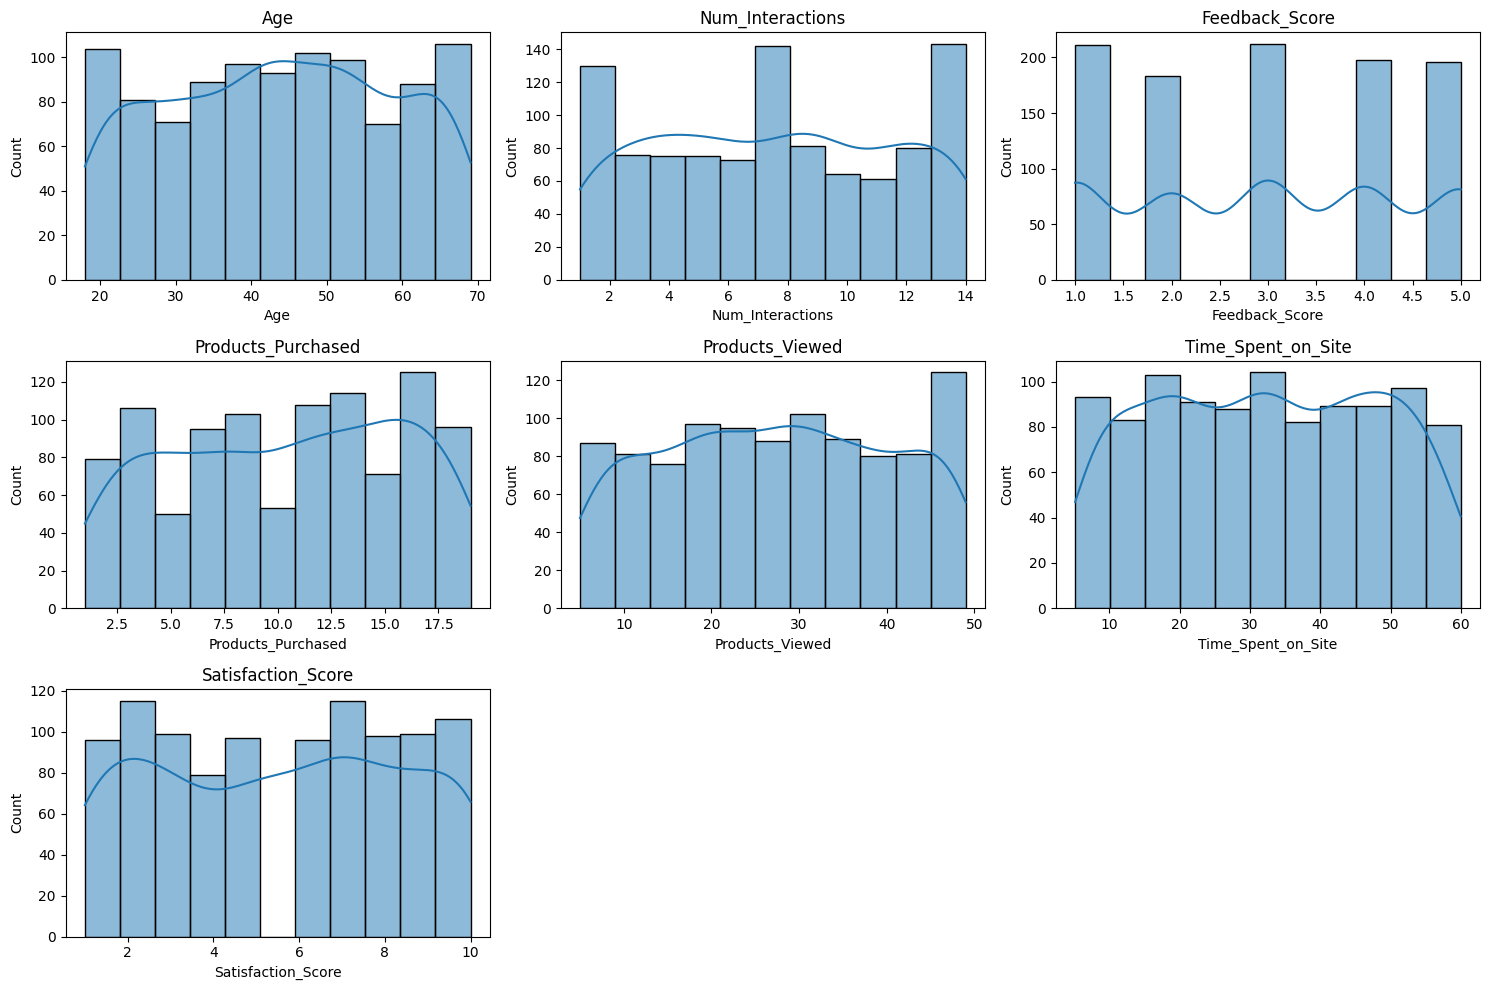

In [18]:
# Sayısal değişkenlerin dağılımını görselleştirme
plt.figure(figsize=(15,10))  # Grafik boyutu
# Her sayısal değişken için histogram oluşturur
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)  # 3x3 gridte i+1. pozisyona grafik yerleştirir
    sns.histplot(df[col], kde=True)  # Histogram ve KDE çizgisi
    plt.title(col)  # Alt grafik başlığı
plt.tight_layout()  # Grafiklerin üst üste binmesini engeller
plt.show()  # Grafikleri gösterir

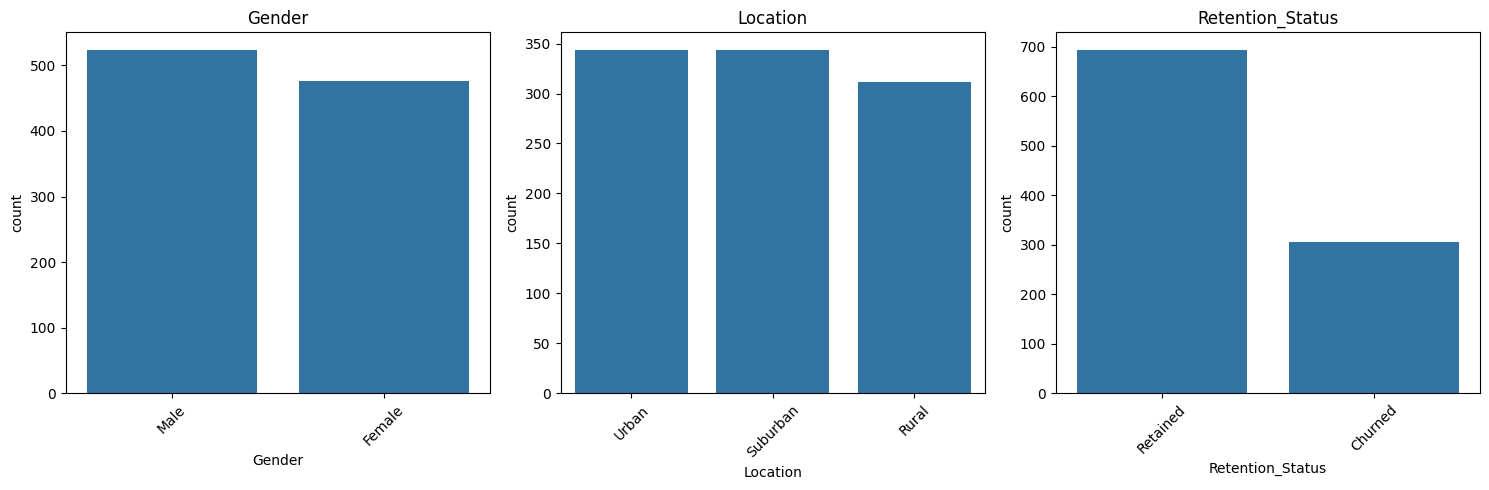

In [19]:
# Kategorik değişkenlerin dağılımını görselleştirme
plt.figure(figsize=(15,5))  # Grafik boyutu
# Her kategorik değişken için sütun grafiği oluşturur
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)  # 1x3 gridte grafikleri yerleştirir
    sns.countplot(data=df, x=col)  # Kategorik değişkenin frekansını gösterir
    plt.title(col)  # Alt grafik başlığı
    plt.xticks(rotation=45)  # X etiketlerini döndürür
plt.tight_layout()  # Grafikleri düzenler
plt.show()  # Grafikleri gösterir

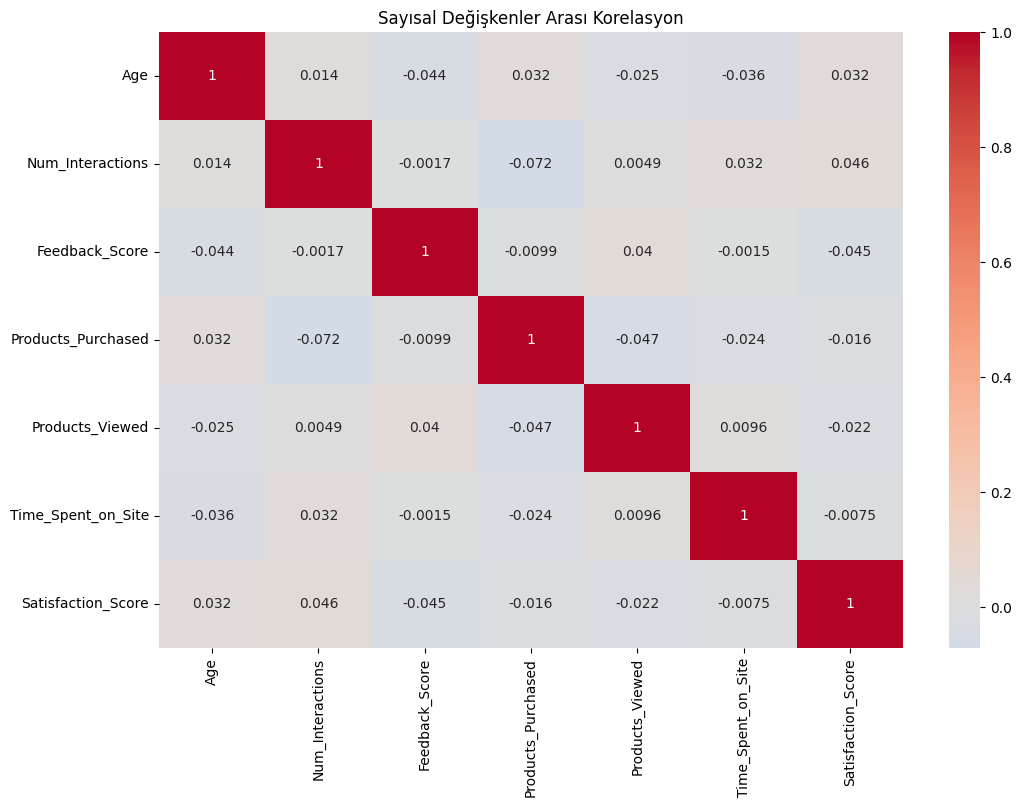

In [20]:
# Korelasyon matrisi oluşturma
plt.figure(figsize=(12,8))  # Grafik boyutu
# Sayısal değişkenler arasındaki korelasyonları hesaplar
corr_matrix = df[num_cols].corr()
# Korelasyon matrisini heatmap olarak çizer
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sayısal Değişkenler Arası Korelasyon')  # Başlık
plt.show()  # Grafiği gösterir

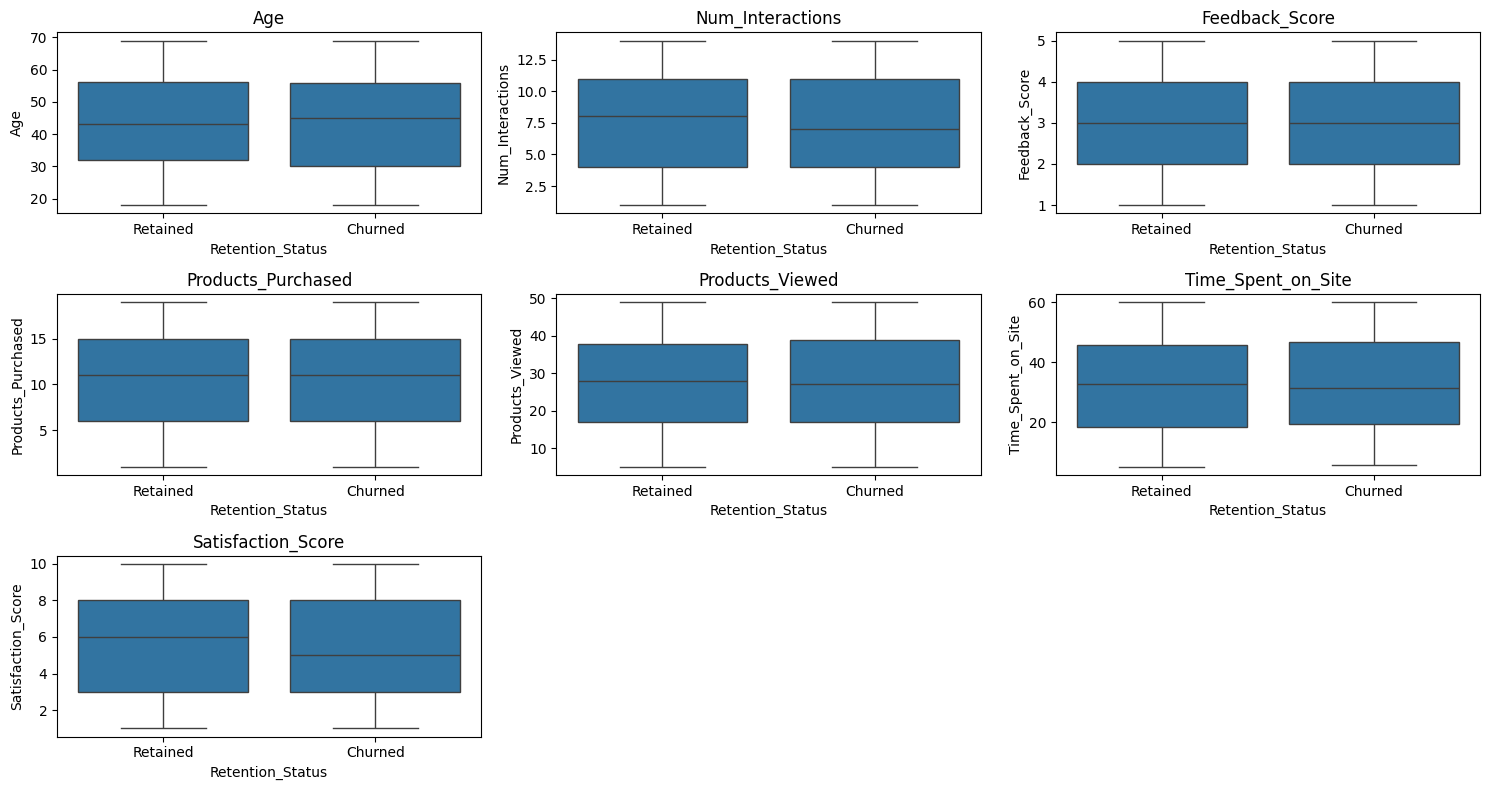

In [21]:
# Retention durumuna göre karşılaştırmalı analiz
plt.figure(figsize=(15,8))  # Grafik boyutu
# Her sayısal değişken için Retention durumuna göre kutu grafiği
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)  # 3x3 gridte grafikleri yerleştirir
    sns.boxplot(data=df, x='Retention_Status', y=col)  # Kutu grafiği
    plt.title(col)  # Alt grafik başlığı
plt.tight_layout()  # Grafikleri düzenler
plt.show()  # Grafikleri gösterir

In [23]:
# Analiz edilmiş veriyi CSV olarak kaydetme
df.to_csv('analyzed_customer_data.csv', index=False)  # index=False ile indeks sütununu kaydetmez
print("\nAnaliz tamamlandı ve veri 'analyzed_customer_data.csv' olarak kaydedildi.")


Analiz tamamlandı ve veri 'analyzed_customer_data.csv' olarak kaydedildi.
